# PS1

## Question 2 a)
We make use of the distance modulus formula to calculate absolute magnitudes. That is $$M = m - 5log_{10}(\frac{d}{10pc}) $$ With these we can simply calculate B-V colour of the star using $B-V = M_B-M_V $ 

The distance modulus needs the distance to the star hence we convert parallax measurements into distances by converting units to arcseconds and using the distance-parallax relation. That is $$d = 1pc\frac{1"}{p} $$ where parallax units are arcseconds.

Text(0, 0.5, 'Absolute Magnitude Visible Band')

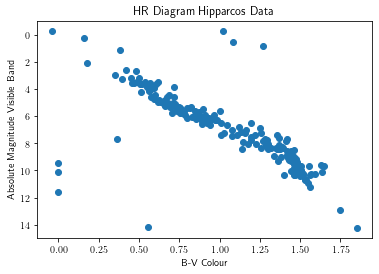

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.constants as const


dataset = np.loadtxt('hipparcos.txt')

 #/1000 to convert from miliarcseconds to arcseconds
parallax = dataset[:,0]/1000
mv = dataset[:,1]
mb = dataset[:,2]
mi = dataset[:,3]


         
def parsecs(parallax):
    return 1/parallax

def distancemod(d):
    return 5*np.log10(d/10)

def absolutemag(m,d):
    return m - distancemod(d)



dmodv = np.vectorize(distancemod)
absmagv = np.vectorize(absolutemag)
parsecv = np.vectorize(parsecs)

Ds = parsecv(parallax)
Mv = absmagv(mv,Ds)
Mb = absmagv(mb,Ds)

BVindex = Mb-Mv

plt.scatter(BVindex,Mv)
plt.gca().invert_yaxis()
plt.title("HR Diagram Hipparcos Data")
plt.xlabel("B-V Colour")
plt.ylabel("Absolute Magnitude Visible Band")




## Question 2 b)
As stated in the problem, we use equation 13.36 from Ryder to calculate temperatures. $$T =\frac{9000K}{(B-V)+0.93} $$ 
 
We want to plot this against $log(\frac{L_V}{L_\odot})$. We can obtain this quantity without having to relly on the solar constant however by using the following modification to the Luminosity equation given in lectures 
$$\begin{align} 
L &= L_{\odot}10^{0.4(M_{\odot}-M)} \\
\frac{L}{L_{\odot}} &= 10^{0.4(M_{\odot}-M)} \\
log_{10}(\frac{L}{L_{\odot}}) &= 0.4(M_{\odot}-M) \\

\end{align} $$



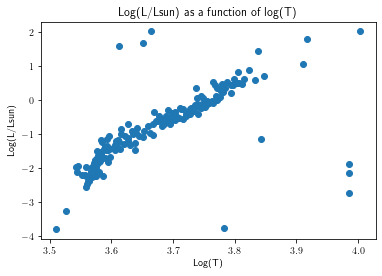

In [54]:
def loglumratio(M):
    return (0.4*(4.74-M)) #value of 4.47 comes from lectures

def temp(BV):
    return 9000/(BV+0.93)

tempv = np.vectorize(temp)
LRv = np.vectorize(loglumratio)

lratios = LRv(Mv)
Ts = tempv(BVindex)





plt.scatter(np.log10(Ts),lratios)
plt.title("Log(L/Lsun) as a function of log(T)")
plt.xlabel("Log(T)")
plt.ylabel("Log(L/Lsun)")
plt.show()

## Question 2 c)
For this question, we start with the Stephan-Boltzmann law $L = A\sigma T^4 $ where A is the area of the stellar surface (i.e. the area of a sphere with R equal to the radius of the star) and $\sigma$ is the Boltzmann constant. Thus, we have the following relation $$L = 4\pi R^2 \sigma T^4 $$

However, to plot these on our plot from question 2b), we need to divide the luminosities by the solar constant and take their logarithm. Simillarly we need to take the log of the temperatures

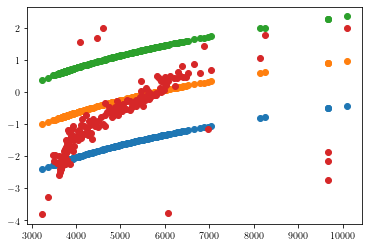

In [55]:
solarconstant = 3.827e26

def blackbodylum(T, R):
    return 4*np.pi*(R**2)*const.sigma*(T**4)


rsol = 6.95700e8
Rs = [0.2*rsol, rsol, 5*rsol]

lum1 = []
lum2 = []
lum3 = []


for i in Ts:
    lum1.append(blackbodylum(i,Rs[0]))
    lum2.append(blackbodylum(i,Rs[1]))
    lum3.append(blackbodylum(i,Rs[2]))



lum1 = np.log10(np.array(lum1)/solarconstant)
lum2 = np.log10(np.array(lum2)/solarconstant)
lum3 = np.log10(np.array(lum3)/solarconstant)

plt.scatter(Ts,lum1)
plt.scatter(Ts,lum2)
plt.scatter(Ts,lum3)
plt.scatter(Ts,lratios)
plt.show()


## Question 2 c) b)
From the plot we generated, as well as the Stephan-Boltzmann law we can conclude that stars with a larger radius have a higher luminosity at the same temperature. This can be seen in the plot where clearly the larger stars produce more luminosities at the same temperature. Another intepretation would be to assume T constant and plugging in values for R in our equation. Clearly, larger values of R will generate more power than smaller values of R. That is R+d where d is a positive constant is larger than R and plugging both in our equation we can establish an inequality showing that indeed stars with larger radii emit more radiation.

## Question 3 a)
Here we simply plot the values for the radial velocity of both stars

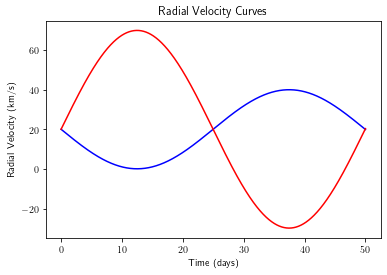

In [16]:
orbitaldata = np.loadtxt('W22_ps1_orbit.dat')

vr1 = orbitaldata[:,1]
vr2 = orbitaldata[:,2]

time = np.linspace(0,50,orbitaldata.shape[0])
plt.plot(time,vr1,'b')
plt.plot(time,vr2,'r')
plt.title("Radial Velocity Curves")
plt.xlabel("Time (days)")
plt.ylabel("Radial Velocity (km/s)")
plt.show()

## Question 3 b)
For this question we are asked to evaluate $m*sin^3(i)$ we do so in the following way

$$ M sin^3(i)= \frac{Pv_{max}^3}{2 \pi G}$$

where we substitute M = m1+m2 and subsequently substitute eithe m1 or m2 using velocity/mass ratios (i.e. abs(v1)=abs(v2)m2/m1) and then isolate for m1sin^3 or m2sin^3 to get
$$m_1sin^3(i)= \frac{|v_2|Pv_{max}^3}{2 \pi G (|v_1|+|v_2|)}$$

or simillarly

$$m_2sin^3(i)= \frac{|v_1|Pv_{max}^3}{2 \pi G (|v_1|+|v_2|)}$$



In [36]:
vdiff = np.abs(vr1-vr2)
vmax = np.amax(vdiff)
arg = np.argmax(vdiff)

vmax *= 1000 
v1 = vr1[arg]*1000
v2 = vr2[arg]*1000
period = 50*24*60*60

def msincube(v1,v2,vmax = vmax, P = period):
    return abs(v1)*P*(vmax**3)/(2*np.pi*const.G*(abs(v1)+abs(v2)))

print(msincube(v1,v2))
print(msincube(v2,v1))



5.0228852335824e+27
3.475211573481397e+30


## Question 3 c)
Here we need to get the log ratio of luminosities $log(\frac{L}{L_0}$ where $L_0$ is the luminosity when both stars are observed. In a similar way as Question 2 b), we can derive an equation for this logged luminosity ratio which only depends on magnitudes. However, here we do this with apparent magnitudes as we do not have a measure of parallax (hence distance) and thus cannot obtain absolute magnitudes. This however does not matter as per the following derivation
 $$ \begin{align}  m-m_0 &= -2.5log(\frac{F}{F_0}) \\ \frac{m_0-m}{2.5} &= log(\frac{F 4 \pi (d)^2}{F_0 4 \pi (d)^2}) \\ \frac{m_0-m}{2.5} &= log(\frac{L}{L_0})\end{align} $$

and as such we simply must get a value for $m_0$ which we can obtain from our data. When the radial velocity curves overlap, this is when both stars would be eclipsing (i.e. the radial component of both their velocity is equal to the velocity of the center of mass. Thus, both stars would be fully visible at the same point we obtain vmax in the previous question. Thus we get m_0 simply by getting the magnitude at arg(vmax) (i.e. the same index as vmax)

Text(0.5, 1.0, 'Light Curve')

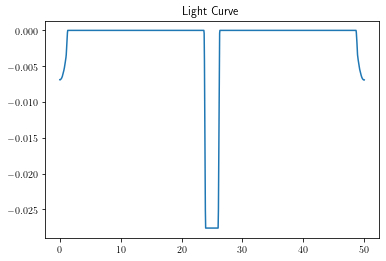

In [18]:
m0 = orbitaldata[arg,3]
m = orbitaldata[:,3]

def orbitallumratio(m):
    return 0.4*(m0-m)
lratiov = np.vectorize(orbitallumratio)

lumratiologged = lratiov(m)

plt.plot(time, lumratiologged)
plt.title("Light Curve")


## Question 3 d) 
Note that I wasn't using git and lost some of my work hence this portion might be rushed
For this question, we need to first convert the relation given in lecture 3 relating eclipse depth ratio to the temperature ratio. To do so, we convert the fluxes into luminosities by multiplying the flux ratio by a factor of 1 (i.e. 4pid^2/4pid^2). Hence we have $$ \frac{\Delta L_2}{ \Delta L_1} = (\frac{T_2}{T_1})^4$$ Then, we can take our data from the previous question and invert the log, as such we have $\frac{L(t)}{L_0}$. Thus we can take a ratio between delta(L1)/L0 and delta(L2)/L0. Taking the ratio cancels the L0's and thus we can use the expression relating luminosity eclipse depth ratios and temperature ratio. Note that these delta's can be expressed as $0-L(t_i)$ To do so, we note that the light curve starts at a minimum (i.e. we us i=0 to isolate delta L2) and for the large dip (delta L1) we can find the index by finding the argument of the lowest value in our light curve.

In [22]:
i2 = 0
i1 = np.argmin(lumratiologged)

def unlog(l):
    return 10**l


unlogv = np.vectorize(unlog)

lumratio = unlogv(lumratiologged)

delta1 = -lumratio[i1]
delta2 = -lumratio[i2]

tempratio = (delta2/delta1)**(1/4)

print("The Temperature Ratio: " + str(tempratio))

The Temperature Ratio: 1.01200230108222


## Question 3 e)
For this question, we apply the transit method presented in Lecture 3. To do so, we must isolate values in our data for the transit time as well as well a value for the orbital velocity. This will allow us to obtain the radii of each star. To obtain a value for the orbital velocity we must...I ran out of time...in the future I will use git because I accidentally deleted 2 questions earlier and had to do them again. 